<a href="https://colab.research.google.com/github/Shantanu9326/Data-Science-Portfolio/blob/master/Telecom_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. I used a dataset from Kaggle [https://www.kaggle.com] that included 7,043 unique customer records for a telecom company called Telco. You can read more about the dataset here [https://www.kaggle.com/blastchar/telco-customer-churn]

### Importing and Merging Data

In [0]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

In [0]:
#Running or Importing .py Files with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# Importing all datasets
churn_data = pd.read_csv("/content/drive/My Drive/app/churn_data.csv") #Churn Data
customer_data = pd.read_csv("/content/drive/My Drive/app/customer_data.csv") #Customer Data
internet_data = pd.read_csv("/content/drive/My Drive/app/internet_data.csv") #Internet Data

In [0]:
#Merging on 'customerID'(Mege Churn and Customer Data)
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')
df_1

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No
5,9305-CDSKC,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Female,0,No,No
6,1452-KIOVK,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,Male,0,No,Yes
7,6713-OKOMC,10,No,Month-to-month,No,Mailed check,29.75,301.9,No,Female,0,No,No
8,7892-POOKP,28,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Female,0,Yes,No
9,6388-TABGU,62,Yes,One year,No,Bank transfer (automatic),56.15,3487.95,No,Male,0,No,Yes


In [0]:
#Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')
telecom

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Female,0,No,No,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,Male,0,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,10,No,Month-to-month,No,Mailed check,29.75,301.9,No,Female,0,No,No,No phone service,DSL,Yes,No,No,No,No,No
8,7892-POOKP,28,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Female,0,Yes,No,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,62,Yes,One year,No,Bank transfer (automatic),56.15,3487.95,No,Male,0,No,Yes,No,DSL,Yes,Yes,No,No,No,No


In [0]:
telecom.shape

(7043, 21)

### Let's understand the structure of our dataframe

In [0]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [0]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [0]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

### Data Preparation

In [0]:
# Converting Yes to 1 and No to 0
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes': 1, 'No': 0})
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes': 1, 'No': 0})
telecom['Churn'] = telecom['Churn'].map({'Yes': 1, 'No': 0})
telecom['Partner'] = telecom['Partner'].map({'Yes': 1, 'No': 0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes': 1, 'No': 0})

In [0]:
telecom

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,8,1,Month-to-month,1,Electronic check,99.65,820.5,1,Female,0,0,0,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,22,1,Month-to-month,1,Credit card (automatic),89.10,1949.4,0,Male,0,0,1,Yes,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,10,0,Month-to-month,0,Mailed check,29.75,301.9,0,Female,0,0,0,No phone service,DSL,Yes,No,No,No,No,No
8,7892-POOKP,28,1,Month-to-month,1,Electronic check,104.80,3046.05,1,Female,0,1,0,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,62,1,One year,0,Bank transfer (automatic),56.15,3487.95,0,Male,0,0,1,No,DSL,Yes,Yes,No,No,No,No


### Dummy Variable Creation(Converting Categorical to Dummy Variable)

In [0]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,cont],axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm],axis=1)

# Creating a dummy variable for the variable 'gender' and dropping the first one.
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
#  dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1],axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
iser = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser],axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os1= os.drop(['OnlineSecurity_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)

# Creating a dummy variable for the variable 'OnlineBackup'.
ob =pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1 =ob.drop(['OnlineBackup_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1],axis=1)

# Creating a dummy variable for the variable 'DeviceProtection'. 
dp =pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1],axis=1)

# Creating a dummy variable for the variable 'TechSupport'. 
ts =pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)

# Creating a dummy variable for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)

# Creating a dummy variable for the variable 'StreamingMovies'. 
sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1],axis=1)

In [0]:
telecom['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

### Dropping the repeated variables

In [0]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [0]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] =telecom['TotalCharges'].convert_objects(convert_numeric=True)
#telecom['tenure'] = telecom['tenure'].astype(int).astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [0]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check        

Now we can see we have all variables as integer.

### Checking for Outliers

In [0]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [0]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outier in your data. The numbers are gradually increasing.

### Checking for Missing Values and Inputing Them

In [0]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_No                          0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [0]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [0]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [0]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

### Feature Standardisation

In [0]:
# Normalising continuous features
df = telecom[['tenure','MonthlyCharges','TotalCharges']]

In [0]:
normalized_df=(df-df.mean())/df.std()

In [0]:
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], 1)

In [0]:
telecom = pd.concat([telecom,normalized_df],axis=1)

In [0]:
telecom

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,-1.280157,-1.161611,-0.994123
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0.064298,-0.260859,-0.173727
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,-1.239416,-0.363897,-0.959581
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0.512450,-0.747797,-0.195234
4,9237-HQITU,1,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,-1.239416,0.196164,-0.940391
5,9305-CDSKC,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,-0.994970,1.158407,-0.645323
6,1452-KIOVK,1,1,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0,-0.424595,0.807745,-0.147302
7,6713-OKOMC,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,-0.913487,-1.164935,-0.874107
8,7892-POOKP,1,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,-0.180148,1.329583,0.336492
9,6388-TABGU,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1.205048,-0.287450,0.531438


### Checking the Churn Rate
Now we will look what is the percentage of number of people who have really churn in the telecom company.Basically, I want to see whether it's a balanced dataset or an imbalance dataset.

In [0]:
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100

In [0]:
churn

26.578498293515356

We have almost 27% churn rate. We have more people who don't churn.

## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'],axis=1)

# Putting response variable to y
y = telecom['Churn']

In [0]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [0]:
# Splitting the data into train and test
#70% Training and 30% Testing
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Running Your First Training Model

In [0]:
import statsmodels.api as sm

In [0]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 01 Jul 2019   Deviance:                       4009.4
Time:                        05:10:18   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.2783      1.187     -2.762      0.006      -5.605      -0.952
PhoneService                              0.8213      0.588      1.396      0.163      -0.332       1.974
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_No                          0.1295      0.205      0.632      0.527      -0.272       0.531
MultipleLines_Yes                         0.6918      0.392      1.763      0.078      -0.077       1.461
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -3.4348      1.324     -2.594      0.009      -6.030      -0.839
OnlineSecurity_No                         0.0905      0.058      1.558      0.119      -0.023       0.204
OnlineSecurity_Yes                        0.0660      0.174      0.380      0.704      -0.275       0.407
OnlineBackup_No                          -0.0088      0.055     -0.161      0.872      -0.116       0.098
OnlineBackup_Yes                          0.1653      0.172      0.960      0.337      -0.172       0.503
DeviceProtection_No                      -0.0832      0.056     -1.487      0.137      -0.193       0.026
DeviceProtection_Yes                      0.2397      0.174      1.379      0.168      -0.101       0.580
TechSupport_No                            0.0935      0.058      1.604      0.109      -0.021       0.208
TechSupport_Yes                           0.0630      0.174      0.362      0.717      -0.278       0.404
StreamingTV_No                           -0.4016      0.133     -3.027      0.002      -0.662      -0.142
StreamingTV_Yes                           0.5581      0.267      2.094      0.036       0.036       1.081
Streaming

### Correlation Matrix

In [0]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

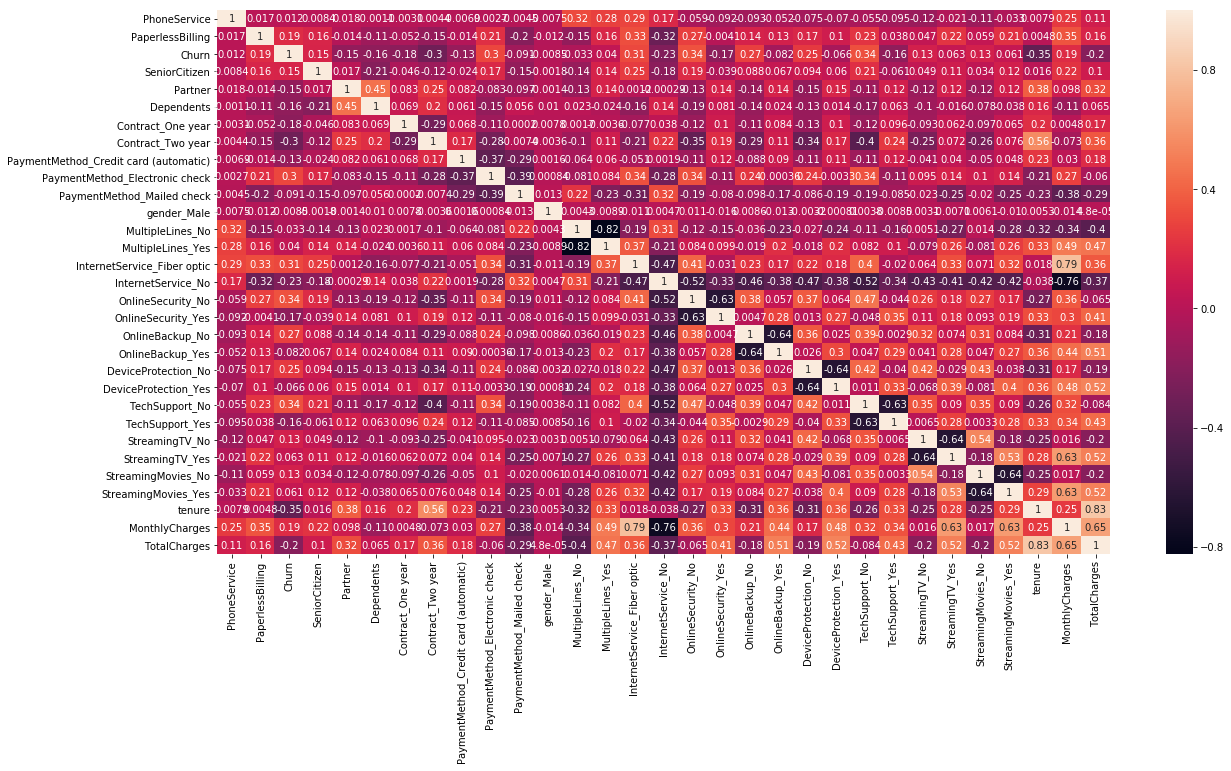

In [0]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))# Size of the figure
sns.heatmap(telecom.corr(),annot = True)

### Dropping highly correlated variables.

In [0]:
X_test2 = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
X_train2 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)

### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

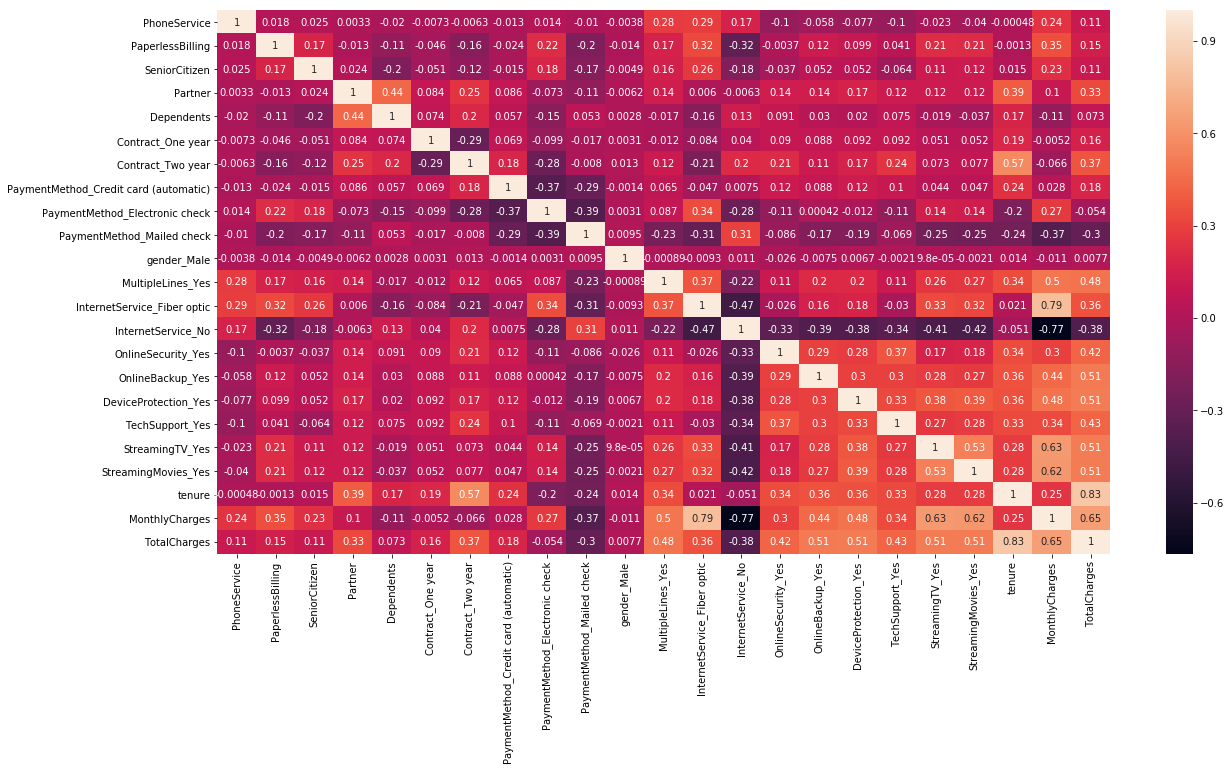

In [0]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train2.corr(),annot = True)

### Re-Running the Model

Now let's run our model again after dropping highly correlated variables

In [0]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 01 Jul 2019   Deviance:                       4009.4
Time:                        05:14:53   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9338      1.545     -2.545      0.011      -6.963      -0.905
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
tenure                                   -1.5198      0.190     -8.015      0.000      -1.891      -1.148
MonthlyCharges                           -2.1817      1.160     -1.880      0.060      -4.456       0.092
TotalCharges                              0.7329      0.198      3.705      0.000       0.345       1.121
=========================================================================================================
"""

### Feature Selection Using Recursive Feature Elimination(RFE)

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)         # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[ True  True False False False  True  True False  True False False  True
 False  True  True False  True False False False False False  True False
 False  True False  True False  True]
[ 1  1  2 18  6  1  1 11  1 12 14  1  8  1  1  4  1 15  5 13 10  7  1  3
 16  1 17  1  9  1]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [0]:
# Variables selected by RFE 
col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [0]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4.fit().summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2024.2
Date:                Mon, 01 Jul 2019   Deviance:                       4048.4
Time:                        05:18:40   Pearson chi2:                 6.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.0162      0.169     -6.017      0.000      -1.347      -0.685
PhoneService                      -0.3090      0.173     -1.784      0.074      -0.648       0.030
PaperlessBilling                   0.3595      0.089      4.029      0.000       0.185       0.534
Contract_One year                 -0.7012      0.127     -5.516      0.000      -0.950      -0.452
Contract_Two year                 -1.3187      0.210     -6.271      0.000      -1.731      -0.907
PaymentMethod_Electronic check     0.3668      0.083      4.446      0.000       0.205       0.529
MultipleLines_No                  -0.2311      0.095     -2.435      0.015      -0.417      -0.045
InternetService_Fiber optic        0.7937      0.116      6.836      0.000       0.566       1.021
InternetService_No                -1.1832      0.182     -6.484      0.000      -1.541      -0.826
OnlineSecurity_Yes                -0.4107      0.102     -4.031      0.000      -0.610      -0.211
TechSupport_Yes                   -0.4181      0.101     -4.135      0.000      -0.616      -0.220
StreamingMovies_No                -0.2024      0.094     -2.160      0.031      -0.386      -0.019
tenure                            -1.4974      0.181     -8.251      0.000      -1.853      -1.142
TotalCharges                       0.7373      0.186      3.965      0.000       0.373       1.102
==================================================================================================
"""

In [0]:
#To address multicollinearity problem
# UDF for calculating VIF value
#Detecting Multicollinearity using Variance Inflation Factor(VIF)
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [0]:
telecom.columns
['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

['PhoneService',
 'PaperlessBilling',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'MultipleLines_No',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_Yes',
 'TechSupport_Yes',
 'StreamingMovies_No',
 'tenure',
 'TotalCharges']

In [0]:
# Calculating Vif value
vif_cal(input_data=telecom.drop(['customerID','SeniorCitizen', 'Partner', 'Dependents',
                                 'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check',
                                 'gender_Male','MultipleLines_Yes','OnlineSecurity_No','OnlineBackup_No',
                                 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
                                 'TechSupport_No','StreamingTV_No','StreamingTV_Yes','StreamingMovies_Yes',
                                 'MonthlyCharges'], axis=1), dependent_col='Churn')

,Var,Vif
0,PhoneService,10.87
12,TotalCharges,8.58
11,tenure,6.80
1,PaperlessBilling,2.61
7,InternetService_No,0.65
3,Contract_Two year,0.28
2,Contract_One year,0.24
9,TechSupport_Yes,0.24
8,OnlineSecurity_Yes,0.21
10,StreamingMovies_No,0.19


### Dropping Variable with high VIF

In [0]:
col = ['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

In [0]:
logm5 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm5.fit().summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.8
Date:                Mon, 01 Jul 2019   Deviance:                       4051.5
Time:                        05:21:11   Pearson chi2:                 6.00e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.1915      0.138     -8.607      0.000      -1.463      -0.920
PaperlessBilling                   0.3563      0.089      3.998      0.000       0.182       0.531
Contract_One year                 -0.6965      0.127     -5.483      0.000      -0.945      -0.448
Contract_Two year                 -1.3078      0.210     -6.230      0.000      -1.719      -0.896
PaymentMethod_Electronic check     0.3700      0.082      4.487      0.000       0.208       0.532
MultipleLines_No                  -0.2990      0.087     -3.442      0.001      -0.469      -0.129
InternetService_Fiber optic        0.7227      0.108      6.666      0.000       0.510       0.935
InternetService_No                -1.2732      0.175     -7.276      0.000      -1.616      -0.930
OnlineSecurity_Yes                -0.4100      0.102     -4.025      0.000      -0.610      -0.210
TechSupport_Yes                   -0.4202      0.101     -4.157      0.000      -0.618      -0.222
StreamingMovies_No                -0.2205      0.093     -2.366      0.018      -0.403      -0.038
tenure                            -1.4276      0.177     -8.066      0.000      -1.774      -1.081
TotalCharges                       0.6495      0.179      3.622      0.000       0.298       1.001
==================================================================================================
"""

In [0]:
# Calculating Vif value
vif_cal(input_data=telecom.drop(['customerID','PhoneService','SeniorCitizen', 'Partner', 'Dependents',
                                 'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check',
                                 'gender_Male','MultipleLines_Yes','OnlineSecurity_No','OnlineBackup_No',
                                 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
                                 'TechSupport_No','StreamingTV_No','StreamingTV_Yes','StreamingMovies_Yes',
                                 'MonthlyCharges'], axis=1), dependent_col='Churn')

,Var,Vif
11,TotalCharges,8.24
10,tenure,6.56
0,PaperlessBilling,2.44
6,InternetService_No,0.45
2,Contract_Two year,0.26
8,TechSupport_Yes,0.24
1,Contract_One year,0.23
7,OnlineSecurity_Yes,0.21
9,StreamingMovies_No,0.17
3,PaymentMethod_Electronic check,0.05


In [0]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Making Predictions

In [0]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])
y_pred

array([[0.50091675, 0.49908325],
       [0.62730407, 0.37269593],
       [0.99326151, 0.00673849],
       ...,
       [0.99619427, 0.00380573],
       [0.54140273, 0.45859727],
       [0.99756576, 0.00243424]])

In [0]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [0]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
y_pred_1

,1
0,0.499083
1,0.372696
2,0.006738
3,0.635453
4,0.007533
5,0.673095
6,0.177610
7,0.005931
8,0.681964
9,0.118320


In [0]:
# Let's see the head
y_pred_1.head()

,1
0,0.499083
1,0.372696
2,0.006738
3,0.635453
4,0.007533


In [0]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [0]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [0]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [0]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [0]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [0]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


In [0]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.499083
1,3730,1,0.372696
2,1761,0,0.006738
3,2283,1,0.635453
4,1872,0,0.007533


In [0]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
#Changing Churn_Prob to 0 and 1
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [0]:
# Let's see the head
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,942,0,0.499083,0
1,3730,1,0.372696,0
2,1761,0,0.006738,0
3,2283,1,0.635453,1
4,1872,0,0.007533,0


### Model Evaluation

In [0]:
from sklearn import metrics

In [0]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[1362,  166],
       [ 249,  333]])

In [0]:
# Predicted     not_churn    churn
# Actual
# not_churn        1326      166
# churn            249       333  

In [0]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.predicted)

0.8033175355450237

In [0]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [0]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5721649484536082

In [0]:
# Let us calculate specificity
TN / float(TN+FP)

0.8913612565445026

In [0]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10863874345549739


In [0]:
# positive predictive value 
print (TP / float(TP+FP))

0.6673346693386774


In [0]:
# Negative predictive value
print (TN / float(TN+ FN))

0.845437616387337


### ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [0]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic(ROC)')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

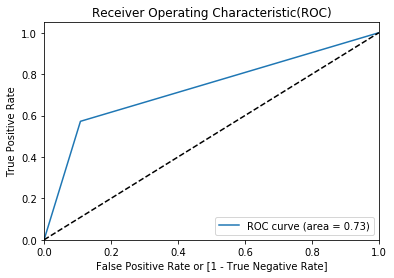

(array([0.        , 0.10863874, 1.        ]),
 array([0.        , 0.57216495, 1.        ]),
 array([2, 1, 0]))

In [0]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [0]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,942,0,0.499083,0,1,1,1,1,1,0,0,0,0,0
1,3730,1,0.372696,0,1,1,1,1,0,0,0,0,0,0
2,1761,0,0.006738,0,1,0,0,0,0,0,0,0,0,0
3,2283,1,0.635453,1,1,1,1,1,1,1,1,0,0,0
4,1872,0,0.007533,0,1,0,0,0,0,0,0,0,0,0


In [0]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.275829  1.000000  0.000000
0.1   0.1  0.605687  0.943299  0.477094
0.2   0.2  0.695261  0.831615  0.643325
0.3   0.3  0.750237  0.743986  0.752618
0.4   0.4  0.783886  0.666667  0.828534
0.5   0.5  0.803318  0.572165  0.891361
0.6   0.6  0.795735  0.412371  0.941754
0.7   0.7  0.757820  0.178694  0.978403
0.8   0.8  0.727962  0.013746  1.000000
0.9   0.9  0.724171  0.000000  1.000000


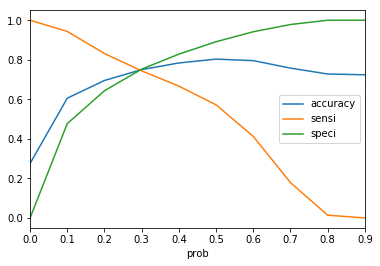

In [0]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [0]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

In [0]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,942,0,0.499083,0,1,1,1,1,1,0,0,0,0,0,1
1,3730,1,0.372696,0,1,1,1,1,0,0,0,0,0,0,1
2,1761,0,0.006738,0,1,0,0,0,0,0,0,0,0,0,0
3,2283,1,0.635453,1,1,1,1,1,1,1,1,0,0,0,1
4,1872,0,0.007533,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.final_predicted)

0.7502369668246446

In [0]:
metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.final_predicted )

array([[1150,  378],
       [ 149,  433]])

#END